<a href="https://colab.research.google.com/github/nella20005/Kickstarter/blob/main/Kick_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Kick Starter Analysis of 2018 Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [ ]:
df = pd.read_csv('ks2018.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


To find the number of rows:

In [ ]:
df.shape

(378661, 15)

Based on the shape function, this data set has 378,661 rows and 15 columns. We can conclude that there were 378,661 kick starter projects in 2018.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


Looking at the not null count and comparing it to the total number of rows, we can see some fields have missing data. The plan is to fill in those fields.

In [ ]:
nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)

['name', 'usd pledged']


We can see that columns name and usd pledged have null values. Let's look at the row with the nulls to see what should be done with the columns with null.

In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

print(rows_with_NaN)

                ID  ... usd_goal_real
169     1000694855  ...       6500.00
328      100149523  ...       3211.53
632     1003023003  ...       3500.00
647     1003130892  ...       6000.00
749     1003629045  ...       3000.00
...            ...  ...           ...
378233   997971307  ...       7500.00
378303   998319149  ...       2752.04
378434     9988744  ...       5000.00
378585   999610349  ...       3080.81
378588   999621278  ...       1710.08

[3801 rows x 15 columns]


Based on the results and the data, the plan will be to remove the column 'name' and replace the null values of 'usd pledged' to the number zero (0). First we will remove the column 'name'.

In [ ]:
new_df = df.drop(['name'], axis=1)
new_df

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


Next step is to replace the null value of the field 'usd pledged' to zero (0).


In [ ]:
new_df['usd pledged'] = new_df['usd pledged'].fillna(0)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   category          378661 non-null  object 
 2   main_category     378661 non-null  object 
 3   currency          378661 non-null  object 
 4   deadline          378661 non-null  object 
 5   goal              378661 non-null  float64
 6   launched          378661 non-null  object 
 7   pledged           378661 non-null  float64
 8   state             378661 non-null  object 
 9   backers           378661 non-null  int64  
 10  country           378661 non-null  object 
 11  usd pledged       378661 non-null  float64
 12  usd_pledged_real  378661 non-null  float64
 13  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 40.4+ MB


Now that the data is clean, we can start analyzing the dataset. 

In [ ]:
new_df.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,6.966168e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.824761e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.345000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.750000e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.000000e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Question 1: Top 5 categories with the total number.

In [ ]:
cat = new_df['category'].value_counts().head(5)
cat

Product Design    22314
Documentary       16139
Music             15727
Tabletop Games    14180
Shorts            12357
Name: category, dtype: int64

Based on this data, you can conclude that most people use the website Kickstarter.com to obtain financial support for designing a product.

Question 2: What is the percentage of projects that completes the goal?

In [ ]:
sucess_KS = new_df.loc[new_df.state == 'successful']
sucess_KS

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
5,1000014025,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
11,100005484,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.00,successful,100,US,12700.00,12700.00,12500.00
14,1000057089,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.00,successful,761,GB,57763.78,121857.33,6469.73
18,1000070642,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.00,successful,7,US,250.00,250.00,250.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378642,999929142,Tabletop Games,Games,EUR,2017-10-31,1000.0,2017-10-04 11:26:44,1246.00,successful,35,FR,66.72,1452.47,1165.70
378644,999934908,Product Design,Design,USD,2015-12-15,3500.0,2015-11-23 07:33:14,6169.00,successful,120,US,6169.00,6169.00,3500.00
378646,999943841,Children's Books,Publishing,USD,2013-11-30,950.0,2013-10-18 21:35:04,1732.02,successful,31,US,1732.02,1732.02,950.00
378651,999969812,Classical Music,Music,CAD,2014-03-22,5000.0,2014-02-20 01:00:16,5501.00,successful,78,CA,5019.92,4983.69,4529.81


In [ ]:
Total_Success = sucess_KS.shape[0]
Total_Success

133956

In [ ]:
Total_KS = new_df.shape[0]
Total_KS

378661

In [ ]:
Complete_Per = (Total_Success / Total_KS)*100
Complete_Per

35.37623362321443

We can conclude that only 35% of Kick Starter Projects are successful in 2018.

Another Question to ask is what is the total pledge by country?

In [ ]:
def percent_plot(data, title):
    '''
    INPUT: data- data of which to graph distribution
            title- graph title
    OUTPUT: Distribution of Data by Percentage Points
    '''
    ax = data.plot(kind='bar')
    plt.title(title)
    ax.yaxis.set_major_formatter(PercentFormatter())
    plt.show();

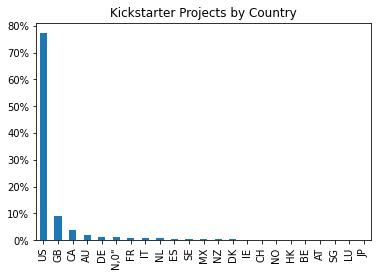

In [ ]:
percent_plot((new_df.country.value_counts()/new_df.shape[0]*100), "Kickstarter Projects by Country")


Now lets see the number of projects by category

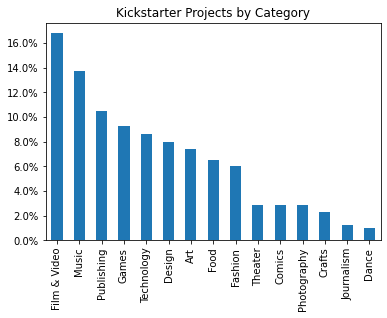

In [ ]:
percent_plot((df.main_category.value_counts()/df.shape[0]*100), 
             "Kickstarter Projects by Category")

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


 Now I need to consider the categorical variables into the model

In [ ]:
sucess_KS.head(5)

,ID,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,Month
5,1000014025,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.0,successful,224,US,52375.00,52375.00,50000.00,2
6,1000023410,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.0,successful,16,US,1205.00,1205.00,1000.00,12
11,100005484,Indie Rock,Music,USD,2013-04-08,12500.0,2013-03-09 06:42:58,12700.0,successful,100,US,12700.00,12700.00,12500.00,3
14,1000057089,Tabletop Games,Games,GBP,2017-05-03,5000.0,2017-04-05 19:44:18,94175.0,successful,761,GB,57763.78,121857.33,6469.73,4
18,1000070642,Music,Music,USD,2012-08-17,250.0,2012-08-02 14:11:32,250.0,successful,7,US,250.00,250.00,250.00,8


In [ ]:

#Split into explanatory and response variables
X = sucess_KS[[ 'goal','pledged', 'backers']]
y = sucess_KS['usd pledged']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.5287001669743496 on 40187 values.'